<a href="https://colab.research.google.com/github/matheus-garcia/avaliacao/blob/main/AvaliacaoSEAZONE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Bibliotecas e Dados**

In [206]:
# Bibliotecas utilizadas

# Manipulação de Dataframes
import pandas as pd

# Operações matriciais
import numpy as np

# Plotagem de gráficos
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Atribuindo dataframes
raw_price = pd.read_csv('desafio_priceav.csv')
raw_details = pd.read_csv('desafio_details.csv')

### ***Data cleaning***

In [296]:
# Retirando colunas indesejadas
df_price = raw_price.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])
df_details = raw_details.drop(columns=['Unnamed: 0', 'ad_name'])

# Olhadinha nos tipos de dados de cada dataframe
print('df_price')
display(df_price.dtypes)
print('\ndf_details')
display(df_details.dtypes)

df_price


airbnb_listing_id      int64
booked_on             object
date                  object
price_string         float64
occupied               int64
dtype: object


df_details


airbnb_listing_id        int64
suburb                  object
number_of_bedrooms     float64
number_of_bathrooms    float64
star_rating            float64
is_superhost              bool
number_of_reviews      float64
dtype: object

In [297]:
# Transformando as datas, de string para datetime, no df_price
df_price['booked_on'] = pd.to_datetime(df_price['booked_on'], errors = 'coerce')
df_price['date'] = pd.to_datetime(df_price['date'], errors = 'coerce')

### **Atividade 1**

Para a primeira atividade, é selecionada a base de dados *desafio_details.csv* que contém os bairros e adicionada uma nova coluna que contará cada anúncio.

Após criada esta nova coluna, a base de dados é agrupada, somando o número dos anúncios e ordenando em ordem crescente.

In [298]:
# Ordenando os bairros conforme os anuncios

# Criando novo DF apenas com os bairros
df_suburb = df_details.filter(['suburb'])

# Criando nova coluna para a contagem dos anuncios
df_suburb['listing_counts'] = 1

# Agrupando pelo bairro e ordenando em ordem crescente de anuncios
df_suburb.groupby('suburb').sum().sort_values(by='listing_counts').reset_index()

,suburb,listing_counts
0,Centro,278
1,Lagoa da Conceição,309
2,Jurerê,539
3,Canasvieiras,1177
4,Ingleses,2388


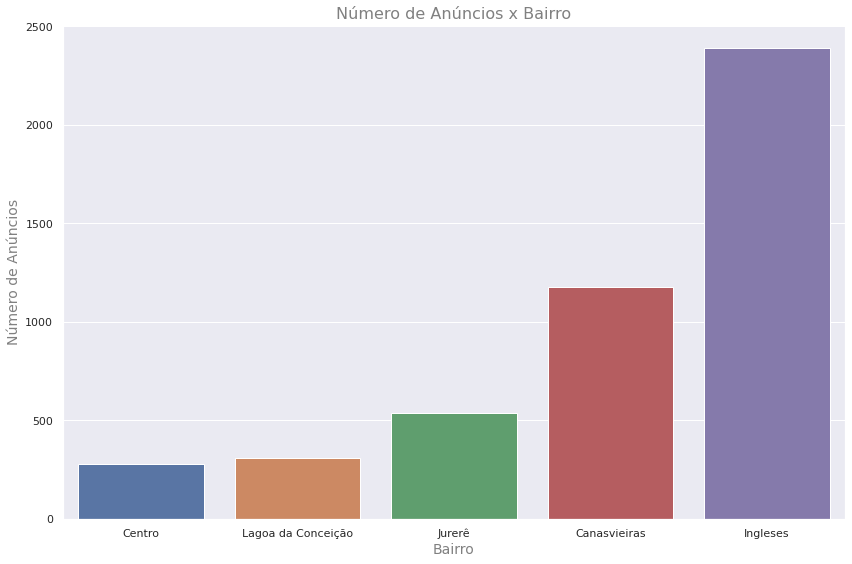

In [299]:
# Ajustando Dataframe para plotar
df_suburb = df_suburb.groupby('suburb').sum().sort_values(by='listing_counts').reset_index()

# Plotando
plt.figure(figsize=(12,8))

sns.set_theme()
sns.barplot(x='suburb', y='listing_counts', data=df_suburb)
plt.xlabel('Bairro', fontsize=14, color='grey')
plt.ylabel('Número de Anúncios', fontsize=14, color='grey')
plt.title('Número de Anúncios x Bairro', fontsize=16, color='grey')

plt.tight_layout()
plt.show()

### **Atividade 2**

Para a segunda atividade, primeiro foi feito um merge das duas bases de dados para que possamos analisar. Após, foram selecionadas apenas as colunas do id do anúncio, bairro, ocupação e preço e foi criado um novo **Dataframe** com estas.

Após, foi realizado um filtro em que foi selecionado apenas as informações em que os imóveis estavam alugados.

Após este filtro, é realizado um agrupamento pelo id do anúncio e bairro, somando a coluna de preços (para o cálculo do faturamento total de cada imóvel).

O último passo feito foi o agrupamento por bairro, aplicação da função de média e organizando o Dataframe de ordem crescente

In [300]:
#  Juntando as duas bases de dados
df_merged = pd.merge(df_price, df_details, how='left')

# Selecionando apenas as colunas em que para a análise
df_faturamento = df_merged.filter(['airbnb_listing_id', 'suburb', 'occupied',
                                   'price_string'])

# Filtrando apenas as linhas em que os imóveis estão ocupados // occupied = 0
df_faturamento = df_faturamento[df_faturamento['occupied'] == 0]

# Agrupando por id de anúncio e bairro e somando a coluna price_string
df_faturamento = df_faturamento.groupby(['airbnb_listing_id',
                                         'suburb']).sum().reset_index()

# Descartando as colunas do id do anúncio e ocupação
df_faturamento = df_faturamento.filter(['suburb', 'price_string'])

# Agrupando por bairro, aplicando a função de média e ajustando em ordem crescente
df_faturamento.groupby('suburb').mean().sort_values(by='price_string').reset_index()

,suburb,price_string
0,Centro,13530.259067
1,Lagoa da Conceição,17498.495283
2,Canasvieiras,20159.476485
3,Ingleses,23668.785311
4,Jurerê,26718.407202


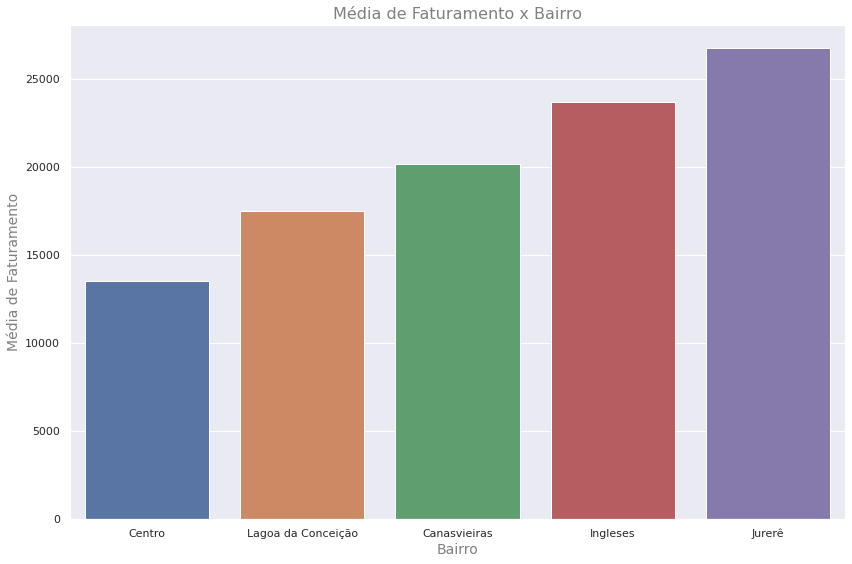

In [301]:
# Ajustando Dataframe para plotar
df_faturamento = df_faturamento.groupby('suburb').mean().sort_values(by='price_string').reset_index()

# Plotando
plt.figure(figsize=(12,8))

sns.set_theme()
sns.barplot(x='suburb', y='price_string', data=df_faturamento)
plt.xlabel('Bairro', fontsize=14, color='grey')
plt.ylabel('Média de Faturamento', fontsize=14, color='grey')
plt.title('Média de Faturamento x Bairro', fontsize=16, color='grey')

plt.tight_layout()
plt.show()

### **Atividade 3**

Para a atividade, foi feito um novo dataframe para que fosse calculado novamente o faturamento de cada imóvel e, realizado um novo merge.

Após o merge, foi retirada a coluna de ocupação do imóvel e a coluna foi transformada em string para que não aparecesse na matriz de correlação.

Por último, foi criada a matriz de correlação e plotado um heatmap, seguindo as cores para daltônicos, para análise.

In [302]:
# Selecionando apenas três colunas do Dataframe merged:
# id do anúncio, preço e ocupação
df_corr = df_merged.filter(['airbnb_listing_id', 'price_string', 'occupied'])

# Filtrando para apenas ocupações
df_corr = df_corr[df_corr['occupied'] == 0]

# Agrupando e somando o preço para ter o faturamento total de cada imóvel
df_corr = df_corr.groupby('airbnb_listing_id').sum().reset_index()

# Juntando o novo Dataframe com o Dataframe details
df_merged_corr = pd.merge(df_corr, df_details, how='left')

# Retirando a coluna occupied pois não será mais utilizada para a análise
df_merged_corr.drop(columns='occupied', inplace=True)

# Transformando a coluna do id do anúncio em string/object
df_merged_corr['airbnb_listing_id'] = df_merged_corr['airbnb_listing_id'].astype('object')

# Criando a matriz de correlação
corr = df_merged_corr.corr()

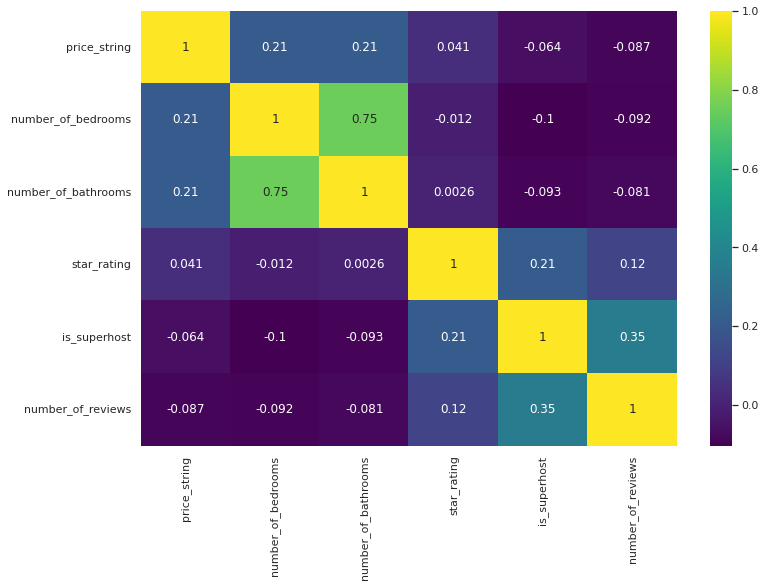

In [303]:
# Plotando um heatmap

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='viridis')

plt.show()

#### Atividade 3 extra

Esta etapa foi feita para analisar o preço do aluguel com as outras características do imóvel, foram feitos os mesmo procedimentos do passo acima.

In [304]:
# Criando novo Dataframe para analisar o preço e suas correlações
df_extra = df_price.drop(columns=['occupied'])

# Agrupando o novo DF pelo id e fazendo a média de preço de aluguel
df_extra = df_extra.groupby('airbnb_listing_id').mean().reset_index()

# Fazendo um merge
df_extra_merged = pd.merge(df_extra, df_details, how='left')

# Coluna id para string/object
df_extra_merged['airbnb_listing_id'] = df_extra_merged['airbnb_listing_id'].astype('object')

# Criando matriz de correlação
corr_extra = df_extra_merged.corr()


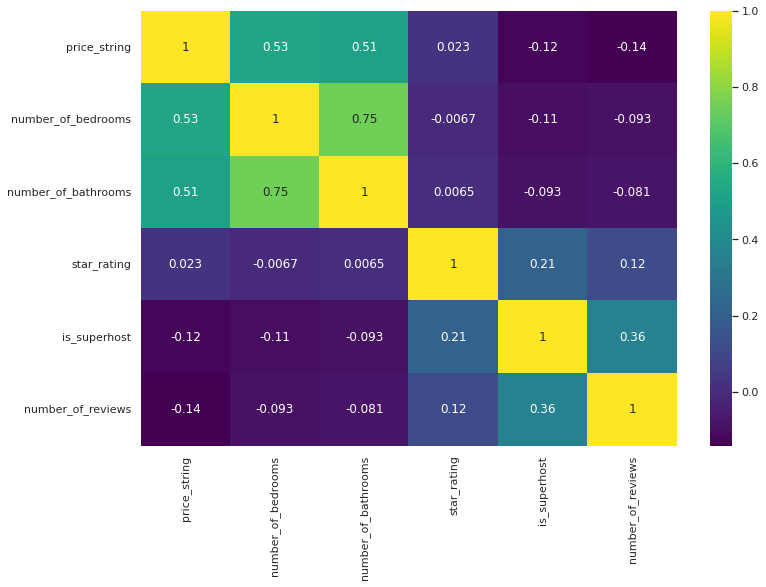

In [305]:
# Criando heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_extra, annot=True, cmap='viridis')

plt.show()

### **Atividade 4**

Para a atividade 4, foi necessário criar um novo Dataframe e, neste, criar duas colunas, uma com o nome do dia da semana e outra com a diferença entre o momento em que é feita a reserva e o dia em que ela se inicia.

Após este procedimento, foi calculada a média dos dias de antecedência total, que foi igual a 32 dias em média, enquanto, quando calculados para cada dia da semana, não fogiu também desta média. 

Os dias de maior média são terça, quarta e quinta, enquanto que o final de semana ficou com uma média bem próxima da total.

In [306]:
# Criando um novo Dataframe para a atividade
df_ant = df_price.copy()

# Criando uma nova coluna com o nome do dia da semana
df_ant['dayofweek'] = df_ant['date'].dt.day_name()

# Criando uma nova coluna com a diferença entre booked_on e date
df_ant['daysdifference'] = (df_ant['date'] - df_ant['booked_on']).dt.days

# Selecionando apenas as colunas necessárias para análise
df_ant = df_ant.filter(['dayofweek', 'daysdifference'])

# Calculando antecedência média das reservas
np.mean(df_ant['daysdifference'])

32.35171050796903

#### Atividade 4a

Para esta etapa, a base de dados é agrupada pelo dia da semana e feita a média dos dias de antecedência de reserva.

Após, é realizada uma reorganização da base de dados, com os dias do final de semana por último e é apresentado o resultado

In [307]:
# Calculando a média de antecedência
df_days = df_ant.groupby('dayofweek').mean().reset_index()

# Reorganizando os dias
df_days = df_days.reindex([1, 5, 6, 4, 0, 2, 3]).reset_index(drop=True)

# Resultados
df_days

,dayofweek,daysdifference
0,Monday,31.893598
1,Tuesday,31.178388
2,Wednesday,32.808432
3,Thursday,32.869940
4,Friday,33.004906
5,Saturday,32.312532
6,Sunday,32.432216


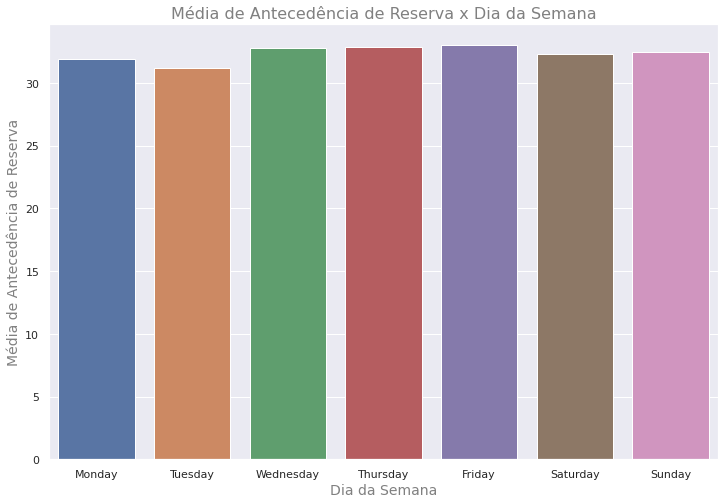

In [308]:
# Plotando
plt.figure(figsize=(12,8))

sns.set_theme()
sns.barplot(x="dayofweek", y="daysdifference", data=df_days)
plt.xlabel('Dia da Semana', fontsize=14, color='grey')
plt.ylabel('Média de Antecedência de Reserva', fontsize=14, color='grey')
plt.title('Média de Antecedência de Reserva x Dia da Semana', fontsize=16, color='grey')

plt.show()